In [5]:
# the meaningfulness of '__init__'
#
class A(object):
    i=22
    # self is defined overhere
    def __init__(self):
        self.x = 'Hello'
    #self is defined by __init__, so only 'foo' needs to be defined in method_a 
    def method_a(self, foo):
        print (self.x + ' ' + foo)

In [8]:
a=A()
a.i

22

In [15]:
a.method_a('Sailor!')

Hello Sailor!


# Draft 

In [1]:
import numpy as np
import MixtureOptDesign

In [2]:
#input
    #design 
    #beta 
    #order
    #q=3  j=2 s=8

# Data
data = [0.3897873, 0.6292498, 0.7009263, 0.4262842, 0.246073770, 0.48413014, 0.2913878, 0.7201046335,
        0.4982357, 0.007519965, 0.2505569, 0.1549670, 0.5415304, 0.3639989, 0.04235179, 0.3279013,
        0.2375383, 0.1180457, 0.2000333, 0.2569634, 0.749005428, 0.03588967, 0.3591402, 0.0009022414,
        0.2549352, 0.636080256, 0.4460236, 0.6877322, 0.2635403, 0.3727396, 0.44510098, 0.2701244,
        0.3726744, 0.2527044, 0.0990404, 0.3167524, 0.004920801, 0.47998018, 0.3494720, 0.2789931250,
        0.2468291, 0.356399779, 0.3034196, 0.1573008, 0.1949293, 0.2632615, 0.51254723, 0.4019743]

# Convert to a numpy array of shape (3, 2, 8)
design = np.array(data).reshape((3, 2, 8))

In [3]:
type(design)

numpy.ndarray

In [7]:
beta = MixtureOptDesign.generate_beta_params(num_params=7,q=3)
beta_star, beta_2, beta_3 = MixtureOptDesign.get_beta_coefficients(beta,3,3)

In [8]:
print('beta:'+' '+str(beta))
print()
print('beta_star:'+' '+str(beta_star)+ ' '+ str(len(beta_star)))
print()
print('beta_2:'+' '+str(beta_2)+ ' '+ str(len(beta_2)))
print()
print('beta_3:'+' '+str(beta_3)+ ' '+ str(len(beta_3)))

beta: [ 0.87481663 -1.30507856  2.04445897  1.09676154 -1.36951049 -1.7239839 ]

beta_star: [ 0.87481663 -1.30507856] 2

beta_2: [ 2.04445897  1.09676154 -1.36951049] 3

beta_3: [-1.7239839] 1


In [9]:
MixtureOptDesign.get_i_optimality_mnl(design,3,beta)

600.8000282493366

In [38]:
MixtureOptDesign.get_i_optimality_mnl(optimal_design,3,beta)

0.959944777152484

In [11]:
#utility and choice_probability
U = MixtureOptDesign.get_utilities(design,beta_star,beta_2,beta_3,3)
P = MixtureOptDesign.get_choice_probabilities(U)

In [12]:
U

array([[ 0.19887878,  0.6494686 ,  0.66383908,  0.2383174 , -0.39070921,
         0.62909762, -0.12309516,  0.84979713],
       [ 0.357489  , -1.12424287, -0.29484399, -0.6944083 ,  0.41903421,
         0.01849735, -0.81058492,  0.04988069]])

In [14]:
P

array([[0.46043037, 0.85491862, 0.72285806, 0.71762794, 0.30794517,
        0.64807772, 0.66540828, 0.68995661],
       [0.53956963, 0.14508138, 0.27714194, 0.28237206, 0.69205483,
        0.35192228, 0.33459172, 0.31004339]])

In [15]:
model_array = MixtureOptDesign.get_model_matrix(design,3)

In [16]:
model_array.shape

(6, 2, 8)

In [17]:
#model_array vs design
design
model_array

array([[[3.89787300e-01, 6.29249800e-01, 7.00926300e-01, 4.26284200e-01,
         2.46073770e-01, 4.84130140e-01, 2.91387800e-01, 7.20104633e-01],
        [4.98235700e-01, 7.51996500e-03, 2.50556900e-01, 1.54967000e-01,
         5.41530400e-01, 3.63998900e-01, 4.23517900e-02, 3.27901300e-01]],

       [[2.37538300e-01, 1.18045700e-01, 2.00033300e-01, 2.56963400e-01,
         7.49005428e-01, 3.58896700e-02, 3.59140200e-01, 9.02241400e-04],
        [2.54935200e-01, 6.36080256e-01, 4.46023600e-01, 6.87732200e-01,
         2.63540300e-01, 3.72739600e-01, 4.45100980e-01, 2.70124400e-01]],

       [[9.25894126e-02, 7.42802331e-02, 1.40208601e-01, 1.09539437e-01,
         1.84310589e-01, 1.73752710e-02, 1.04649073e-01, 6.49708213e-04],
        [1.27017818e-01, 4.78330126e-03, 1.11754291e-01, 1.06575796e-01,
         1.42715084e-01, 1.35676804e-01, 1.88508232e-02, 8.85741419e-02]],

       [[1.45263748e-01, 1.59014193e-01, 6.94200211e-02, 1.35026543e-01,
         1.21088005e-03, 2.32372872e-01

In [18]:
information_matrix=MixtureOptDesign.get_information_matrix_mnl(design=design,order=3,beta=beta)

In [19]:
information_matrix.shape

(6, 6)

In [20]:
#optimal design

b = MixtureOptDesign.CoordinateExchangeIOptimal(design,order=3,n_points=100,iteration=10)

In [21]:
b.get_design()
optimal_design=b.optimize_design()

In [22]:
print(str(optimal_design.shape)) 
print()
print(optimal_design)

(3, 2, 8)

[[[0.         0.50505051 0.         1.         0.         0.39393938
   0.         0.        ]
  [0.74747475 0.         0.33333333 0.30221216 0.         0.26262626
   0.11111111 0.57549085]]

 [[0.         0.49494949 0.         0.         1.         0.
   0.         0.53535354]
  [0.         0.         0.28096945 0.21212121 0.         0.48730083
   0.43395419 0.21212121]]

 [[1.         0.         1.         0.         0.         0.60606061
   1.         0.46464646]
  [0.25252525 1.         0.38569734 0.48566663 1.         0.2500729
   0.45493469 0.21238794]]]


In [17]:
plot = MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design)

In [20]:
MixtureOptDesign.MNLVis.plot_ternary_design(design)

In [18]:
plot

In [34]:
#clustering
x = optimal_design[0].flatten()
y = optimal_design[1].flatten()
z = optimal_design[2].flatten()
table = np.vstack((x,y,z)).T
cluster_design = MixtureOptDesign.hierarchical_clustering(table,8)

In [33]:
MixtureOptDesign.MNLVis.plot_ternary_design(cluster_design)

In [35]:
print(cluster_design.shape)

print(optimal_design.shape)


(3, 8, 1)
(3, 2, 8)


In [4]:
#elbow curve

from MixtureOptDesign.CoordinateExchange import *

In [6]:
CoordinateExchangeIOptimal(design,order=3, 100)

SyntaxError: positional argument follows keyword argument (2909726378.py, line 1)

In [23]:
class Cluster:
    def __init__(self, design:np.ndarray):
        x = design[0].flatten()
        y = design[1].flatten()
        z = design[2].flatten()
        # Stack the x, y, and z arrays vertically
        self.design_ = design
        data = np.vstack((x, y, z)).T
        self.data = data
        self.labels = None
        self.clusters = None

    def fit(self, k:int)-> np.ndarray:
        pass

    def design(self) -> np.ndarray:
        # Check if clusters have been computed
        if self.clusters is None:
            raise ValueError("No clusters found. Call 'fit' method first.")

        # Use the replace_with_clusters function to assign each data point to its corresponding cluster
        return replace_with_clusters(self.data, self.labels, self.clusters)
    
    def get_elbow_curve(self,beta:np.ndarray,order:int):
        """
        Plots the elbow curve for the given clustering algorithm between the start and end values of k.

        Parameters
        ----------
        beta : numpy.ndarray of shape (p,)
                A 1-dimensional array of p numbers of beta coefficients for the model.
            
        order : int
                The maximum order of interactions to include in the model. Must be 1, 2 or 3.
            

        Returns
        -------
        plot

        Notes
        -----
        The function computes the I optimality for each value of k between start (number of parameters) and end (unique point) and plots it.
        """
        # Compute the I-optimality criterion for each value of k
        i_opt_values = []
        
        # Set the maximum number of clusters
        max_clusters = self.get_unique_rows(self.data)

        for k in range(beta.size + 1, max_clusters + 1):
            # Fit the clustering algorithm for the given value of k
            self.fit(k)
            
            # Replace the data points with cluster values
            replaced_data = self.design()
            cluster_design = replaced_data.T.reshape(self.design_.shape)
            
            # Calculate the I-optimality criterion for the replaced values
            i_opt = get_i_optimality_mnl(cluster_design, order, beta)

            # Store the I-optimality criterion value
            i_opt_values.append(i_opt)


        # Plot the elbow curve
        plt.plot(range(beta.size + 1, max_clusters + 1), i_opt_values, 'bx-')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('I-optimality')
        plt.title('Elbow curve')
        plt.show()
    

    def get_unique_rows(self,arr:np.ndarray, tolerance=1e-9)->int:
        """
        Get the unique rows of a 2D numpy array based on a specified tolerance level for element-wise equality comparisons.

        Parameters
        ----------
        arr : numpy.ndarray
            The 2D numpy array to get the unique rows of.
        tolerance : float, optional
            The tolerance level for element-wise equality comparisons. Default is 1e-9.

        Returns
        -------
        int
            The length of the unique rows of the input array.

        """
        # Use numpy.isclose to compare the rows with a tolerance level
        close_arr = np.isclose(arr[:, None, :], arr, rtol=tolerance, atol=tolerance).all(axis=2)

        # Use numpy.unique to select the unique rows
        unique_rows_idx = np.unique(close_arr, axis=0, return_index=True)[1]
        unique_rows_idx.sort()
        unique_rows = arr[unique_rows_idx]

        return unique_rows.shape[0]



In [39]:
m=Cluster(optimal_design)
m.fit(k=5)


In [40]:
lablelabelss=m.labels
clusters = m.clusters

In [41]:
import plotly as plt

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [36]:
m.get_elbow_curve(beta,order=3)

ValueError: No clusters found. Call 'fit' method first.

(<AxesSubplot:xlabel='num_clusters'>,
    num_clusters       I_value
 0             4 -1.814976e+16
 1             5  1.916080e+16
 2             6 -2.448092e+16
 3             7  1.018092e+01
 4             8  8.749362e+00)

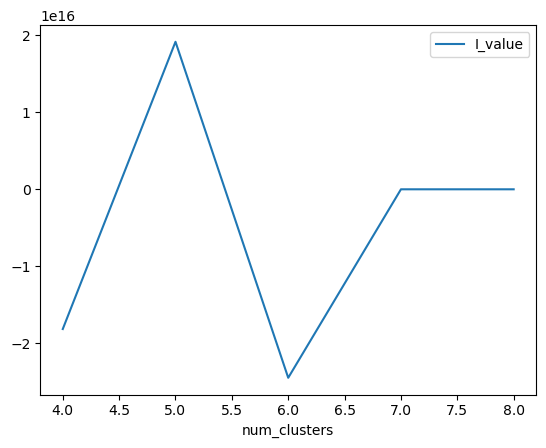

<AxesSubplot:xlabel='num_clusters'>

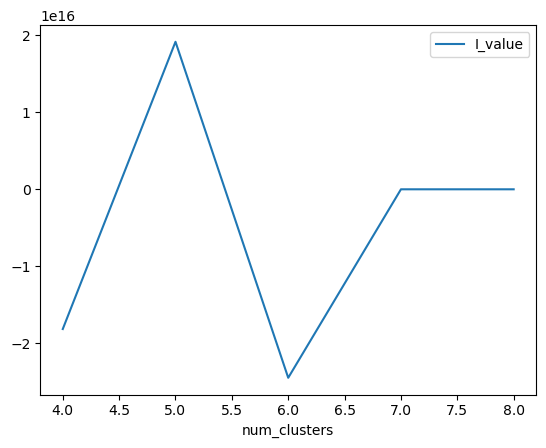

8.749361810436811

NameError: name 'MixtureOptDesign' is not defined